In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Import csv
df= pd.read_csv(r"C:\Users\user\Desktop\Presidents Comments\tinubu_df.csv")

In [3]:
#lets look at the dataset
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets
0,0,2022-07-17 23:59:33+00:00,0,Twitter for Android,@SelfAdulation @officialABAT One of the Kuje e...
1,1,2022-07-17 23:59:14+00:00,0,Twitter for Android,@Facaloni_ @LaoMureli @TinubuMediaS Lol with i...
2,2,2022-07-17 23:59:12+00:00,0,Twitter for Android,@Ahmadusanij Isn't God super wonderful? Tinubu...
3,3,2022-07-17 23:59:06+00:00,3,Twitter for Android,@BabatundeBaba19 @BrightIrem @nextofkinpapi @k...
4,4,2022-07-17 23:58:58+00:00,2,Twitter for Android,Yoruba race must bring down Tinubu. A drug bar...


In [4]:
#clean the dataset
#clean text
def cleanTxt(text): 
    text = re.sub('@[A-Za-z0-9]+',' ',text)
    text = re.sub('#',' ',text)
    text = re.sub('RT\s+','',text)
    text = re.sub('https?:\/\/\S+','',text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [5]:
#take a look at the cleaned dataframe
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets
0,0,2022-07-17 23:59:33+00:00,0,Twitter for Android,One of the Kuje escapee has spoken\nThanks...
1,1,2022-07-17 23:59:14+00:00,0,Twitter for Android,"_ Lol with is pass abiii, so Na Tinubu no..."
2,2,2022-07-17 23:59:12+00:00,0,Twitter for Android,Isn't God super wonderful? Tinubu declared h...
3,3,2022-07-17 23:59:06+00:00,3,Twitter for Android,"Everyone knows that if he is free,..."
4,4,2022-07-17 23:58:58+00:00,2,Twitter for Android,Yoruba race must bring down Tinubu. A drug bar...


In [6]:
#create a function to get the subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

#create a function to get the polarity
def getpolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# create two new columns 'Subjectivity' & 'Polarity'

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polartiy']=df['Tweets'].apply(getpolarity)


In [7]:
#create function to define the sentiment text

def getSentiment (score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
#create new column for sentiment text

df['Sentiment'] = df['Polartiy'].apply(getSentiment)

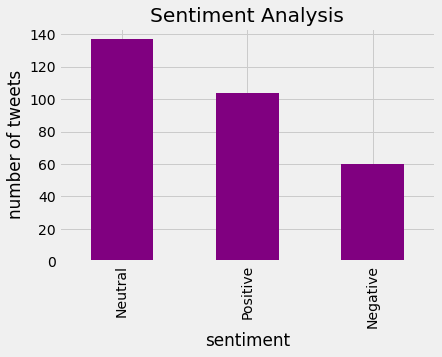

In [8]:
df['Sentiment'].value_counts().plot(kind = 'bar',color = 'purple')
plt.title('Sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('number of tweets')
plt.show()


In [9]:
#find the count of each value in 'Sentiment column'
df.Sentiment.value_counts()

Neutral     137
Positive    104
Negative     60
Name: Sentiment, dtype: int64